In [5]:
%matplotlib notebook
import pandas as pd
import numpy as np
import scipy.stats as stats
from matplotlib import pyplot as plt
from matplotlib import rcParams
import gmaps

# Gmaps API Keys
from config import gkey

df = pd.read_csv("Output/cleaned_venue_data2.csv")
df.count()

Neighborhood              1226
Neighborhood Latitude     1226
Neighborhood Longitude    1226
Venue Name                1226
Venue ID                  1226
Venue Category            1226
Venue Latitude            1226
Venue Longitude           1226
Venue City                1106
Venue State               1226
Likes                     1225
Rating                     216
dtype: int64

# What are the most popular neighborhoods for music venues in New York City? 

<IPython.core.display.Javascript object>


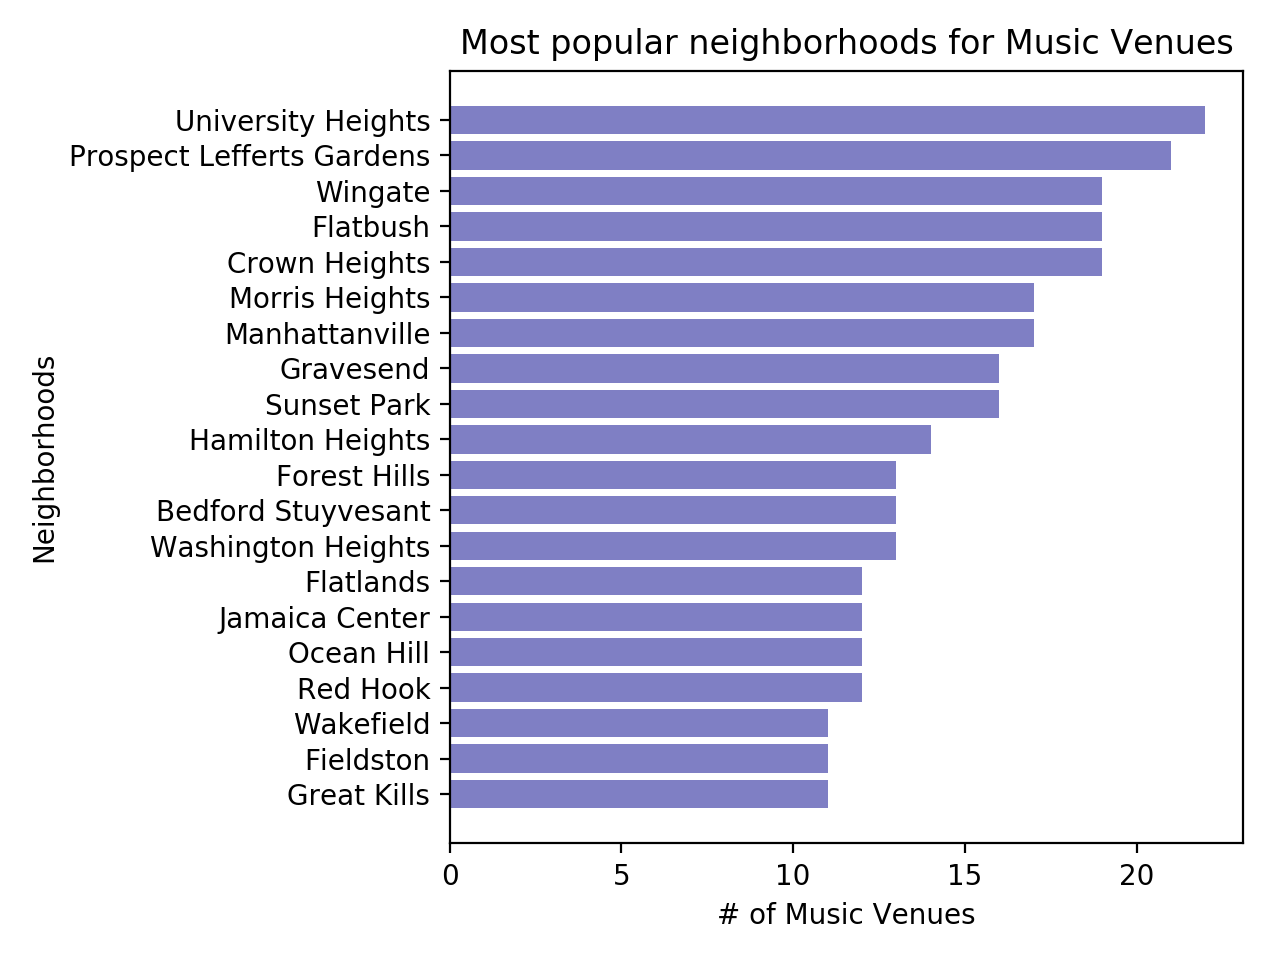

In [4]:
# rank neighborhoods in by count of venues bar chart
venue_count = df[['Neighborhood','Venue ID']].groupby('Neighborhood').count()
venue_count = venue_count.rename(columns={'Venue ID':'Venue Count'})
venue_count = venue_count.sort_values('Venue Count', ascending=True)
venue_count = venue_count.reset_index()
# venue_count.reset_index(key='Neighborhood', inplace = True)
venue_count = venue_count[-21 : -1]

y_axis = np.arange(0, 20)
tick_locations = []
for y in y_axis:
    tick_locations.append(y)

plt.title("Most popular neighborhoods for Music Venues")
plt.xlabel("# of Music Venues")
plt.ylabel("Neighborhoods")

# plt.xlim(-0.75, 0 -.25)
# plt.ylim(0, max(members) + 5)

# neighborhoods = venue_count['Neighborhood']
# neighborhoods
plt.barh(venue_count['Neighborhood'], venue_count['Venue Count'], facecolor="Darkblue", alpha=0.5, align="center")
plt.tight_layout()
plt.savefig("Output/Venue_Counts.png", bbox_inches="tight")
plt.show()

In [22]:
# HEATMAP of Music venues by number of venues in neighborhood 
# Creating a dataframe that holds the information about number of musical venues by neighborhoods
grouped_df = df.groupby(["Neighborhood"])
venue_count = grouped_df["Venue Name"].count()
lat = grouped_df["Neighborhood Latitude"].mean()
lon = grouped_df["Neighborhood Longitude"].mean()

df2 = pd.DataFrame({
    "Venue Count":venue_count,
    "Latitude": lat,
    "Longitude": lon
})

# Configure gmaps
gmaps.configure(api_key=gkey)

# Store latitude and longitude in locations
locations = df2[["Latitude","Longitude"]]

# Create a marker_layer using the poverty list to fill the info box
fig = gmaps.figure()
heat_layer = gmaps.heatmap_layer(locations, weights=df2["Venue Count"], 
                                 dissipating=False, max_intensity=10,
                                 point_radius=0.013)
# Add layer
fig.add_layer(heat_layer)
# Display figure
fig

Figure(layout=FigureLayout(height='420px'))

# What are the most popular venues by Category?

<IPython.core.display.Javascript object>


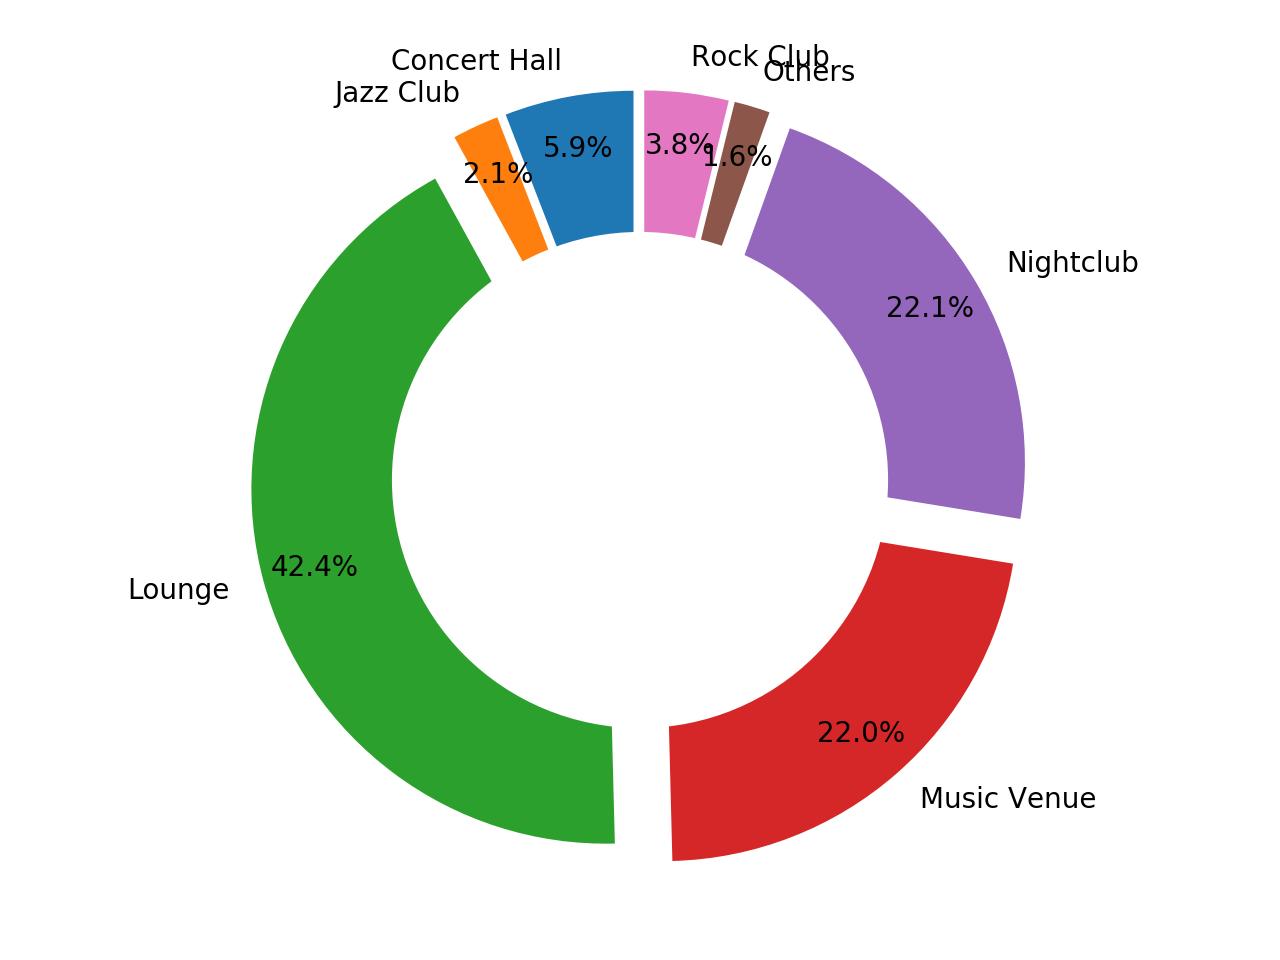

In [92]:
# Pie chart by total number of venues in category

#creating DataFrame for pie chart
grouped_df = df.groupby(["Venue Category"])
venue_count = grouped_df["Venue Name"].count()
piedf = pd.DataFrame ({
    "Count": venue_count
}).reset_index()

# Grouping categories with less than 15 into OTHERS
piedf.loc[piedf["Count"] < 15, "Venue Category"] = "Others"
grouped_df = piedf.groupby(["Venue Category"])

venue_count = grouped_df["Count"].sum()
pie_df = pd.DataFrame ({
    "Count": venue_count
}).reset_index()

# Pie chart
labels = pie_df["Venue Category"]
sizes = pie_df["Count"]

#explsion
explode = [0.1 for x in labels]
 
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.savefig("Output/pie_chart.png", bbox_inches="tight")
plt.show()

# Which neighborhoods have the most highly rated/most liked venues? And is there a relationship between likes and ratings?

In [ ]:
# Which neighborhoods have the most highly rated/most liked venues? 

# Removing all the rows with none value in first dataframe
cleaned = df.dropna(how="any")

#Grouping by Neighborhood and getting needed columns for new dataframe
grouped_df = cleaned.groupby(["Neighborhood"])
likes = grouped_df["Likes"].mean()
rating = grouped_df["Rating"].mean()
lat = grouped_df["Neighborhood Latitude"].mean()
lon = grouped_df["Neighborhood Longitude"].mean()

#Creating dataframe
summary = pd.DataFrame({
    "Likes":likes,
    "Rating":rating,
    "Latitude": lat,
    "Longitude": lon
})
summary.head()

<IPython.core.display.Javascript object>


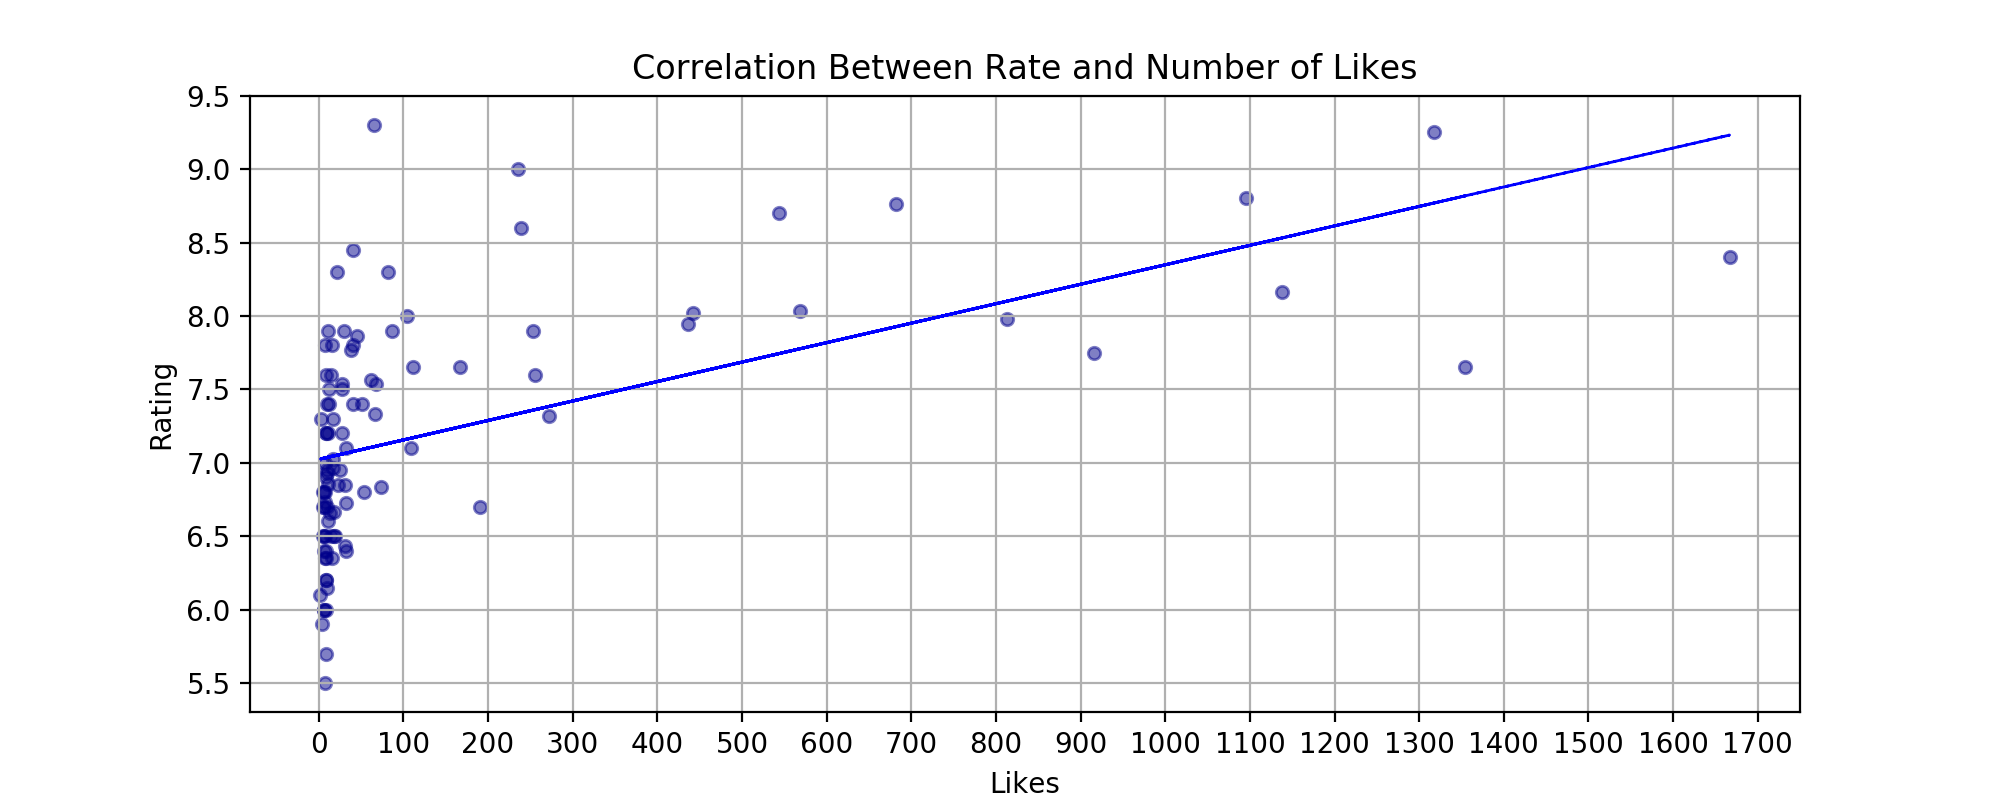

In [15]:
# Line to see the correlation of rates and likes
m_slope, m_int, m_r, m_p, m_std_err = stats.linregress(likes, rating)
m_fit = m_slope * likes + m_int

# scatter plot
ax1 = summary.plot.scatter(x='Likes',
                           y='Rating',
                           c='DarkBlue',
                           alpha=0.5,
                           figsize=(10,4),
                           xticks=np.arange(0, 1800, 100),
                           title = "Correlation Between Rate and Number of Likes")
ax1.plot(likes, m_fit, "b--", linewidth=1)
ax1.grid()
plt.savefig("Output/correlation.png", bbox_inches="tight")

<IPython.core.display.Javascript object>


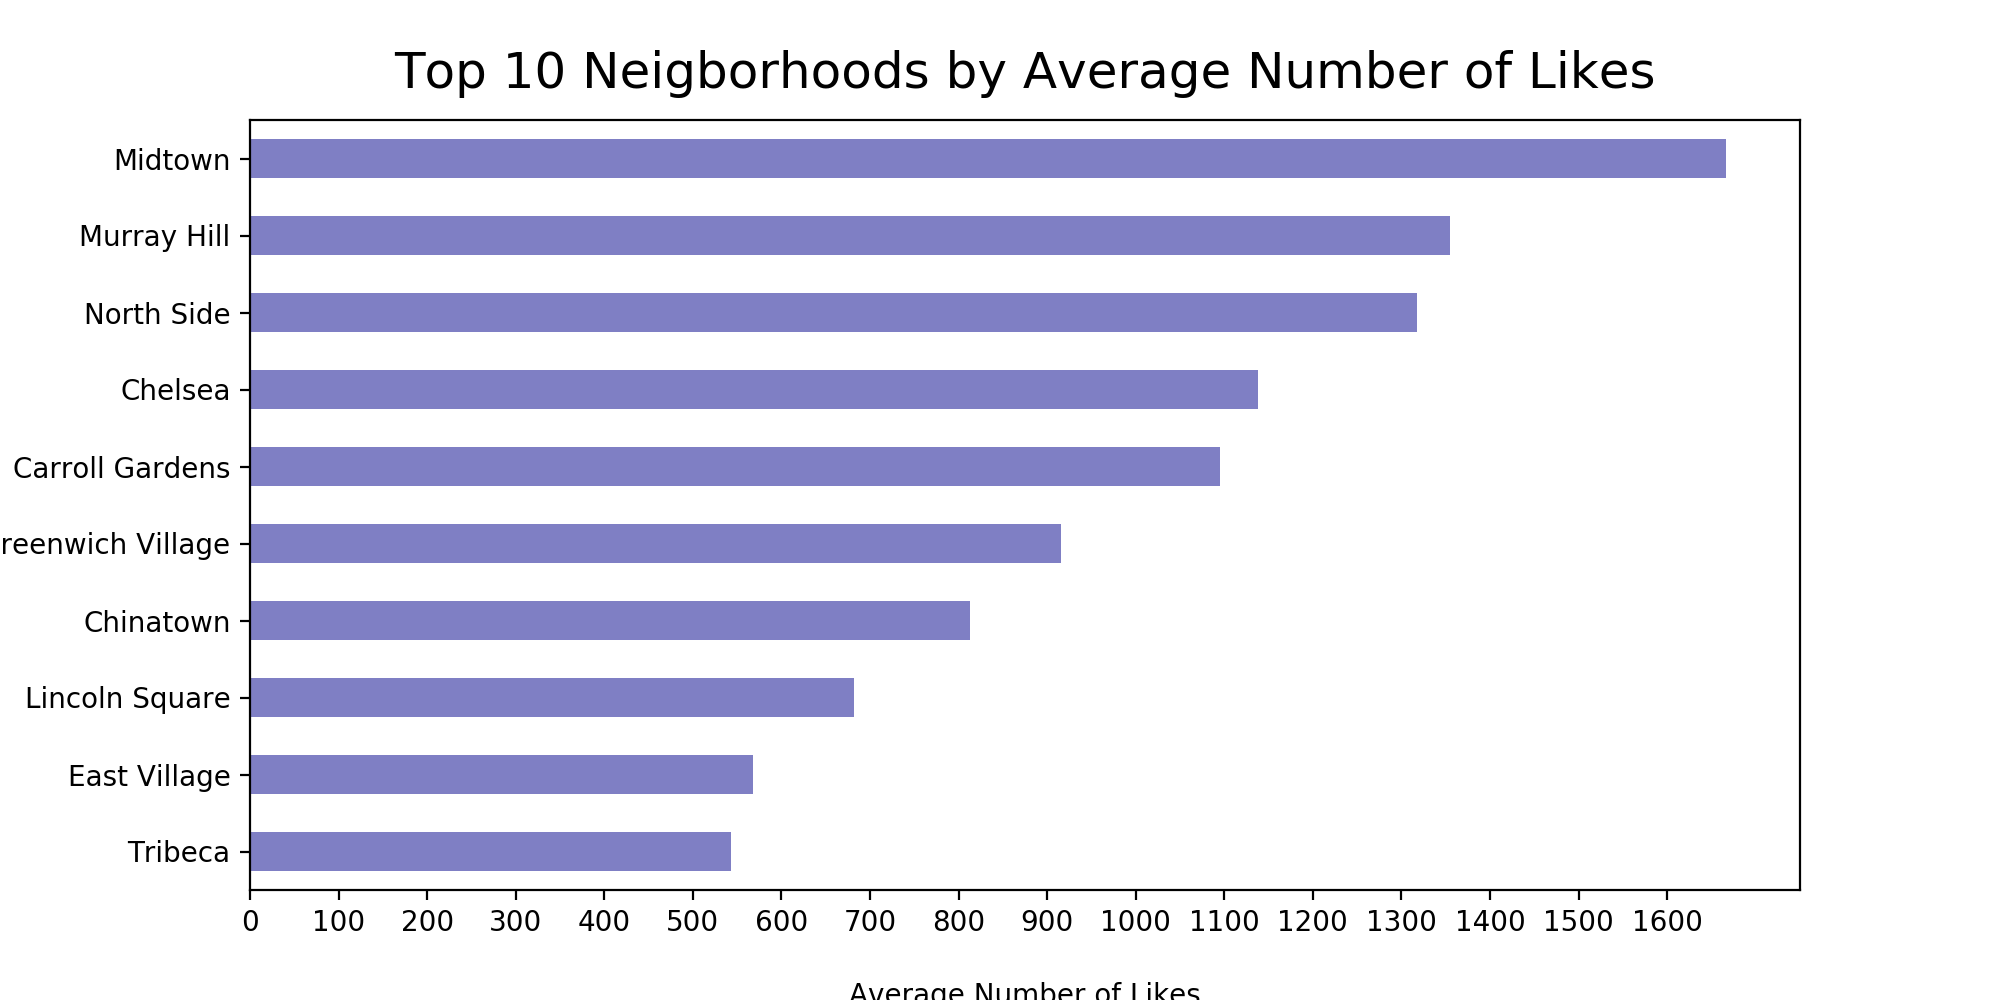

In [16]:
# Sorting dataframe by likes to get top values
sort_likes = summary.sort_values("Likes", ascending=True)

# Creating bar chart
sort_likes["Likes"][-10:].plot(kind='barh', color="Darkblue", alpha=0.5, figsize=(10, 5), xticks=np.arange(0, 1700, 100))

plt.xlabel("Average Number of Likes", labelpad=16)
plt.ylabel("Neighborhood", labelpad=16)
plt.title("Top 10 Neigborhoods by Average Number of Likes", y=1.02, fontsize=18)
plt.savefig("Output/Top10bylikes.png", bbox_inches = "tight")

<IPython.core.display.Javascript object>


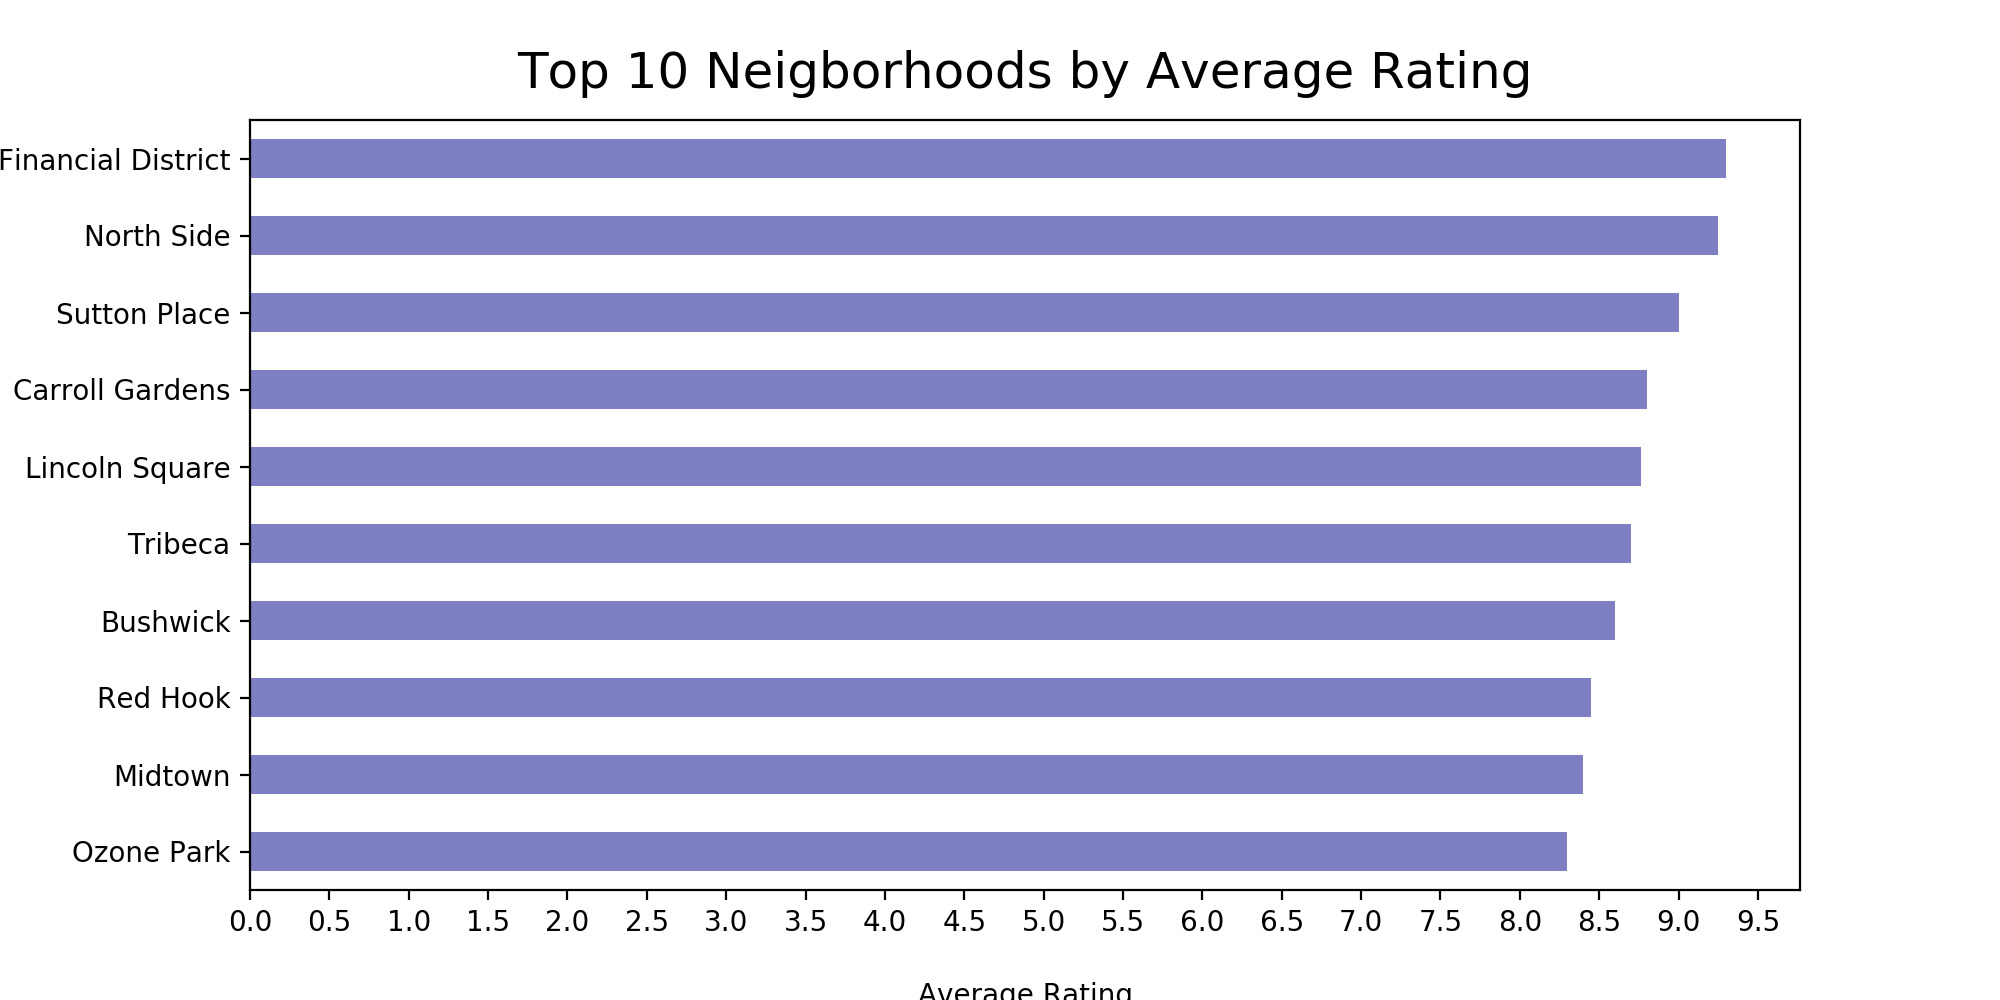

In [17]:
# Sorting by Rating
sort_rate = summary.sort_values("Rating", ascending=True)

# Creating bar chart
sort_rate["Rating"][-10:].plot(kind='barh', color="Darkblue", alpha=0.5, figsize=(10, 5), xticks=np.arange(0, 10, 0.5))

plt.xlabel("Average Rating", labelpad=16)
plt.ylabel("Neighborhood", labelpad=16)
plt.title("Top 10 Neigborhoods by Average Rating", y=1.02, fontsize=18)

plt.savefig("Output/Top10byrate.png", bbox_inches = "tight")